In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

In [2]:
df=pd.read_excel("japan.new.xlsx")

In [3]:
df=df.groupby(df['Date']).sum()

In [4]:
df

,Confirmed Cases,Exposure under investigation,Total Deaths,Exposure in China,Exposure outside China
Date,,,,,
2020-02-03,153,6,1,123,24
2020-02-07,265,66,1,150,54
2020-02-11,389,146,1,165,84
2020-02-15,505,229,2,170,127
2020-02-19,871,570,3,174,180
2020-02-23,1657,965,17,178,626


In [5]:
day=pd.Series([1,2,3,4,5,6])
cases=df['Confirmed Cases']

In [6]:
cases.reset_index()

,Date,Confirmed Cases
0,2020-02-03,153
1,2020-02-07,265
2,2020-02-11,389
3,2020-02-15,505
4,2020-02-19,871
5,2020-02-23,1657


In [7]:
df=df[['Confirmed Cases']]

In [8]:
df.set_index(day)

,Confirmed Cases
1,153
2,265
3,389
4,505
5,871
6,1657


In [9]:
cases=df['Confirmed Cases']

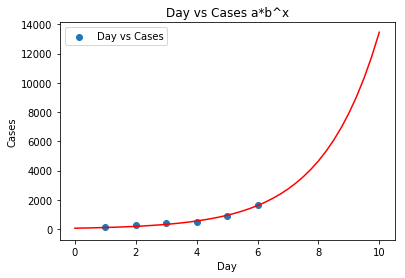

In [10]:
def func3(x, a, b):
    return a * b ** x
popt, pcov = curve_fit(func3, day, cases, p0=[1, 1e-6])
x_plot=np.linspace(0,10,41)
plt.plot(x_plot, func3(x_plot, *popt), 'r-')
plt.scatter(day,cases,label='Day vs Cases')
plt.title("Day vs Cases a*b^x")
plt.xlabel('Day')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [11]:
y_plot=func3(x_plot,*popt)

In [12]:
expDf=pd.DataFrame(list(zip(x_plot,y_plot)),columns=['day','predicted cases'])

In [ ]:
expDf.to_csv(r'exp-japa')